In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)

df

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index
0,2014-01-01,1440,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288
1,2014-02-01,524,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547
2,2014-03-01,611,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028
3,2014-04-01,328,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468
4,2014-05-01,503,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918
...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,170,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474
101,2022-06-01,196,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328
102,2022-07-01,147,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271
103,2022-08-01,214,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620


In [2]:
def isJan(date):
    if date[5:7] == '01':
        return 1
    else:
        return 0
    
df['isJan'] = df['DATE'].apply(lambda x: isJan(x))

df

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,isJan
0,2014-01-01,1440,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1
1,2014-02-01,524,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,0
2,2014-03-01,611,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,0
3,2014-04-01,328,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,0
4,2014-05-01,503,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,0
...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,170,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,0
101,2022-06-01,196,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,0
102,2022-07-01,147,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,0
103,2022-08-01,214,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,0


In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels =['DATE_DELTA','CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index','MORT30US', 'isJan']
X = df[feature_labels]
y = df[['FORECLOSURE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [4]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [5]:
y_pred = regressor.predict(X_test)

In [6]:
r2_score(y_test,y_pred)

-0.27310654282682334

In [7]:
X_train.head(20)

,DATE_DELTA,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,MORT30US,isJan
50,1520.0,4.3,2.842381,1.506129,2.09073,0.83017,-0.26257,249.581,4.4440,0
55,1673.0,4.2,2.889130,1.914839,1.74515,0.25883,1.07922,251.749,4.5500,0
42,1277.0,4.8,2.318000,1.150645,1.13086,0.30910,0.50412,244.243,3.9675,0
12,365.0,6.8,1.881500,0.114839,-1.24664,0.61772,0.61587,234.747,3.6700,1
8,243.0,7.3,2.534286,0.088333,1.94307,0.16591,-0.25902,237.477,4.1625,0
88,2677.0,7.9,1.621000,0.058065,-2.75355,2.23433,0.39517,268.599,2.9625,0
67,2038.0,4.1,1.626364,2.125806,-3.59104,0.07657,-0.12546,256.179,3.6160,0
84,2557.0,8.8,1.081053,0.085161,4.49760,1.02281,1.08780,262.200,2.7350,1
85,2588.0,8.6,1.257895,0.075714,4.17695,1.15288,0.79495,263.346,2.8100,0
30,912.0,5.5,1.504000,0.391613,3.45446,0.13183,2.68273,240.101,3.4400,0


---

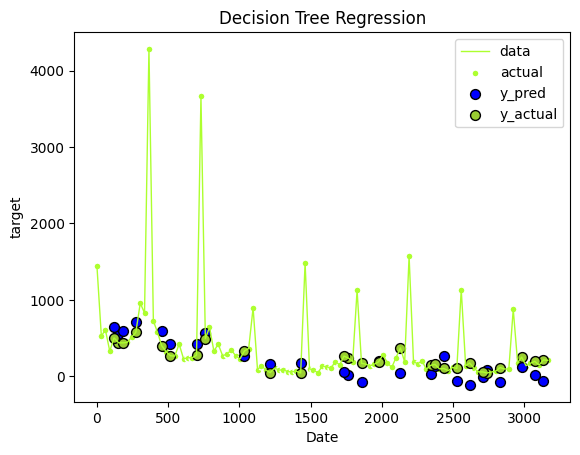

In [8]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure()
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
plt.scatter(X_test['DATE_DELTA'], y_test, s=50, edgecolor="black", c="yellowgreen", label="y_actual")

plt.xlabel("Date")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()